In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/spam - spam.csv')
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
countClass=data.groupby('v1').count()
countClass

,v2
v1,
ham,4825
spam,747


In [ ]:
# Create a new column on the dataframe to show the length of each message.
data['Length'] = data['v2'].apply(len)

# See the length of the first 10 messages.
data.head(10)

,v1,v2,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Use LabelEncoder() to normalize class labels (ham and spam)
le = LabelEncoder()
# Encode the Class column.
y_enc = le.fit_transform(data['v1'])
# Create a new column called "Label" to show the normalized label.
data["v1"] = y_enc
# Show the first 5 messages of the dataframe to see the results.
data.head()

,v1,v2,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Create a new column called Clean Message.
data["Clean Message"] = data["v2"].copy()
data["Clean Message"] = data["Clean Message"].str.replace(r'\d+(\.\d+)?', '')
data["Clean Message"] = data["Clean Message"].str.replace(r'[^\w\d\s]', ' ')
data["Clean Message"] = data["Clean Message"].str.replace(r'\s+', ' ')
data["Clean Message"] = data["Clean Message"].str.replace(r'^\s+|\s+?$', '')

# Make all words lower case
data["Clean Message"] = data["Clean Message"].str.lower()

# Remove all 1 letter words
data["Clean Message"] = data["Clean Message"].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
data.head()

,v1,v2,Length,Clean Message
0,0,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Create a list of tokens after messages have been cleaned
data['Tokens'] = data['Clean Message'].map(lambda text: nltk.tokenize.word_tokenize(text))
# Create new column to see the length of messages after cleaning.
data['Clean Length'] = data['Clean Message'].apply(len)
data.head()

,v1,v2,Length,Clean Message,Tokens,Clean Length
0,0,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...",111
1,0,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...",61


<Axes: xlabel='Clean Length', ylabel='Count'>

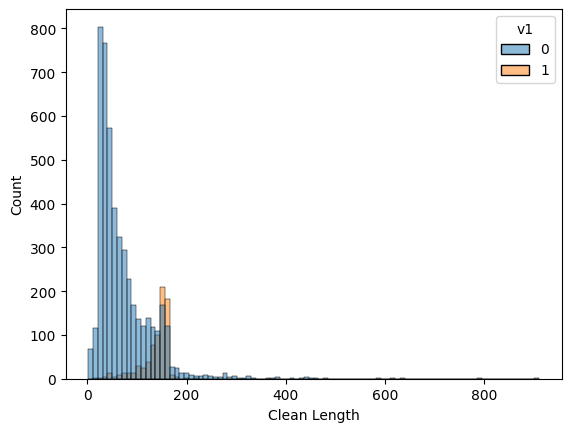

In [ ]:
## The distribution of length with hue = v1
sns.histplot(data=data, x='Clean Length', hue='v1')

The length of the text has an impact for label

In [ ]:
from collections import Counter

In [ ]:
ham_count = Counter(" ".join(data[data['v1']==0]["Clean Message"]).split()).most_common(20)
ham_count_df = pd.DataFrame.from_dict(ham_count)
ham_count_df = ham_count_df.rename(columns={0: "words in ham", 1 : "count"})

spam_count = Counter(" ".join(data[data['v1']==1]["Clean Message"]).split()).most_common(20)
spam_count_df = pd.DataFrame.from_dict(spam_count)
spam_count_df = spam_count_df.rename(columns={0: "words in spam", 1 : "count_"})

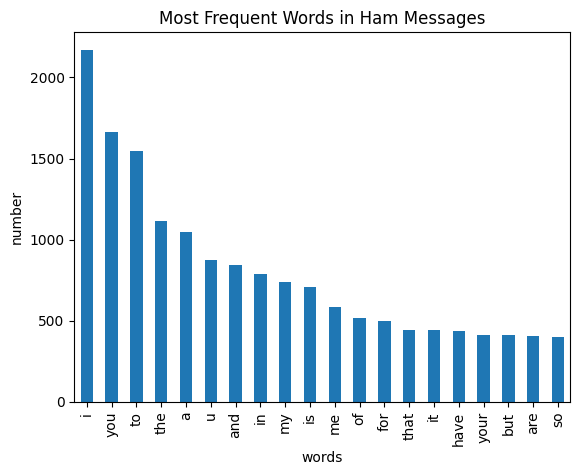

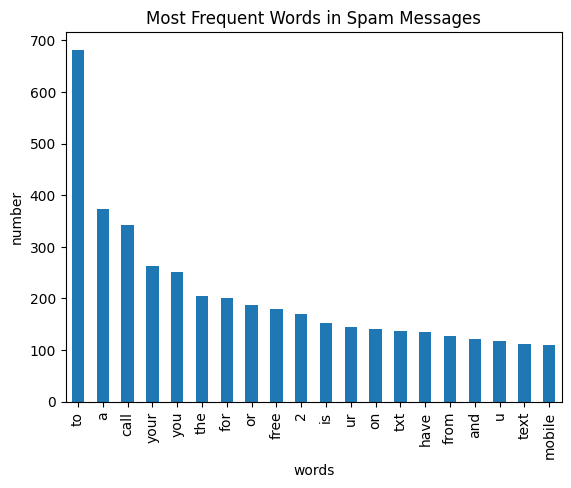

In [ ]:
ham_count_df.plot.bar(legend = False)
y_pos = np.arange(len(ham_count_df["words in ham"]))
plt.xticks(y_pos, ham_count_df["words in ham"])
plt.title('Most Frequent Words in Ham Messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

spam_count_df.plot.bar(legend = False)
y_pos = np.arange(len(spam_count_df["words in spam"]))
plt.xticks(y_pos, spam_count_df["words in spam"])
plt.title('Most Frequent Words in Spam Messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

If there many words "to" , your text will be spam

In [ ]:
df = data.copy()
# Remove the unwanted columns.
df.drop(["Clean Message", "Length", "Tokens", "Clean Length"], axis = 1, inplace = True)
# View the first few rows of the new dataframe.
print(df.count())

v1    5572
v2    5572
dtype: int64


BUILDING TRAIN AND TEST

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'],
                                                    df['v1'],
                                                    test_size=0.3,stratify=df['v1'],
                                                    random_state=101)

In [ ]:
from sklearn.utils import resample

Balancing Dataset by Upsampling the Minority Class

In [ ]:
# Concatinating X_train and y_train column to form a complete dataset having both SMS Message and Label columns
X_train_resample=pd.concat([X_train, y_train], axis=1)

all_ham=X_train_resample[X_train_resample['v1']==0] # All ham messages

all_spam=X_train_resample[X_train_resample['v1']==1] # All spam messages

#Upsampling the datset by using resample from sklearn library
spam_upsampled = resample(all_spam,replace=True,n_samples=3350,random_state=101) # bringing number of spam messages up to 4825 from 747

# Concatinating upsampled spam messages with ham messaegs to create a new and balanced dataset
df_upsampled = pd.concat([all_ham, spam_upsampled])

# Splitting into X_train and y_train again
X_train=df_upsampled['v2']
y_train=df_upsampled['v1']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Conveting the training data into TFIDF values.
tfidf = TfidfVectorizer(stop_words = 'english', use_idf = True, lowercase = True, strip_accents='ascii')
X_train_tfidf = tfidf.fit_transform(X_train) # Fit the data into a sparse matrix, then transform it
X_test_tfidf = tfidf.transform(X_test) # Frequency term matrix
print(X_train_tfidf.shape)

(6727, 6869)


The result is a sparse matrix where:

The lines correspond to the X_train documents.
The columns correspond to the vocabulary terms learned.
The values ​​are the TF-IDF weights of the terms.

## MODEL

BERNOUILLI NAIVES BAYES

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
Model1=BernoulliNB(
)
Model1.fit(X_train_tfidf,y_train)

BernoulliNB()

In [ ]:
Model1.score(X_train_tfidf,y_train)

0.9826074030028245

In [ ]:
ypredNB=Model1.predict(X_test_tfidf)

F1 score for the test

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f1_score(y_test,ypredNB))

0.9610983981693364


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {
#     'alpha': [0.1, 0.5, 1.0, 2.0],  # Smoothing values
#     'binarize': [0.0, 0.5, 1.0, None]  # Threshold for binarization
# }

# # Initialize the BernoulliNB model
# model = BernoulliNB()

# # Setup GridSearchCV
# # Change scoring to 'f1' instead of 'f1_score'
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                            cv=5, scoring='f1', n_jobs=-1, verbose=1)

# # Fit GridSearchCV on the training data
# grid_search.fit(X_train_tfidf, y_train)

# # Print the best parameters and corresponding score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation:", grid_search.best_score_)

# # Use the best model for predictions
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_tfidf)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'alpha': 0.1, 'binarize': 0.0}
Best Cross-Validation: 0.9921753623342976


#### After Grid Search , I see that the default Hyperameters is the best

F1 score : 0.9610983981693364

### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgmodel=LogisticRegression(
)
lgmodel.fit(X_train_tfidf,y_train)

LogisticRegression()

In [ ]:
lgmodel.score(X_train_tfidf,y_train)

0.9962836331202616

In [ ]:
y_predLog=lgmodel.predict(X_test_tfidf)
print(f1_score(y_test,y_predLog))

0.9545454545454546


Defaultly Logistic regression hyperparameters is the best

score : 0.9545454545454546

### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RForest=RandomForestClassifier(
)
RForest.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [ ]:
RForest.score(X_train_tfidf,y_train)

1.0

In [ ]:
y_predRF=RForest.predict(X_test_tfidf)
print(f1_score(y_test,y_predRF))

0.9333333333333333


In [ ]:
## GRID SEARCH FOR Random FOrest
param_grid = {
    'n_estimators': [50, 100,500],
    'max_depth': [None, 10, 20]
    }
modelRf=RandomForestClassifier()
grid_search = GridSearchCV(estimator=modelRf, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)
# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation:", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': None, 'n_estimators': 500}
Best Cross-Validation: 0.9985079063931449


In [ ]:
## prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f1_score(y_test,y_pred))

0.9383886255924171


I see that , I can Improve the capacity of this last model by (GridSearch)but I don't have enough time

### So for my analysis ⁉

- Best model : BERNOUILLI NAives BAYES with F1 score : 0.9610983981693364